# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
%matplotlib inline

df_train = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Browser 5 random rows from train.csv

In [2]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.2750,NaN,S
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.00,0,1,2691,14.4542,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.00,2,0,3101276,7.9250,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.00,1,0,PC 17485,56.9292,A20,C


Browser 5 random rows from test.csv

In [3]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
303,1195,3,"Pokrnic, Mr. Tome",male,24.0,0,0,315092,8.6625,NaN,S
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
175,1067,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,NaN,S
123,1015,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,NaN,S


# Verifying Data

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's check any missing value.

In [7]:
null_data = df_train.isnull().sum()
find_null_number = pd.DataFrame({'field':null_data.index,'amount':null_data.values})
for x_amount,y_field in zip(find_null_number.amount,find_null_number.field):
    if x_amount > 0:
        print(y_field,'is missing',x_amount,'data.')

Age is missing 177 data.
Cabin is missing 687 data.
Embarked is missing 2 data.


Okay, we got missing data in dataset.

# Visualizing Data

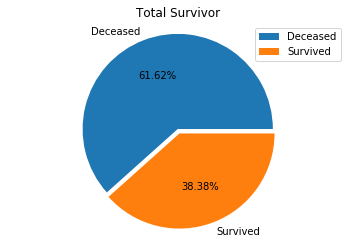

In [8]:
labels = ['Deceased','Survived']
plt.pie(df_train['Survived'].value_counts(),labels=labels,explode=[0.05,0],autopct='%1.2f%%')
plt.axis('equal')
plt.title('Total Survivor')
plt.legend(labels,loc=1)
plt.show()

Text(0.5,1,'Gender')

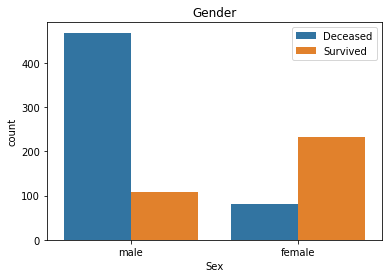

In [9]:
sns.countplot(x='Sex',hue='Survived',data=df_train)
plt.legend(labels,loc=1)
plt.title('Gender')

Text(0.5,1,'Class')

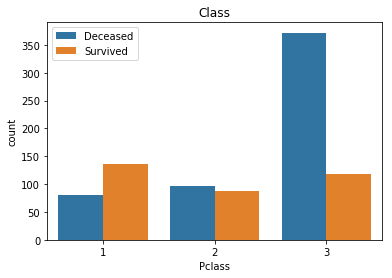

In [10]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)
plt.legend(labels,loc=2)
plt.title('Class')

Text(0.5,1,'Embarked')

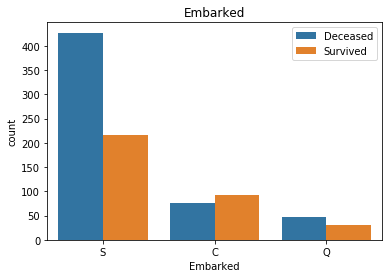

In [11]:
sns.countplot(x='Embarked',hue='Survived',data=df_train)
plt.legend(labels,loc=1)
plt.title('Embarked')

Text(0.5,1,'Ages')

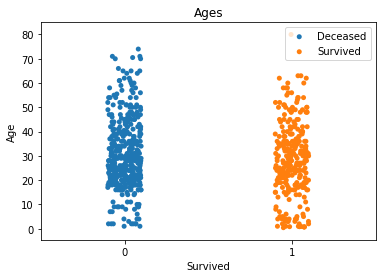

In [12]:
sns.stripplot(x="Survived",y="Age",jitter=True,data=df_train)
plt.legend(labels,loc=1)
plt.title('Ages')

# Encoding Data

In [13]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['ageG1','ageG2','ageG3','ageG4','ageG5','ageG6','ageG7','ageG8']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x:x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['fares1','fares2','fares3','fares4','fares5']
    categories = pd.cut(df.Fare,bins,labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x:x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x:x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket','Name','Embarked'],axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_test = transform_features(df_test)

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,ageG5,1,0,fares2,N,"Braund,",Mr.
1,2,1,1,female,ageG7,1,0,fares5,C,"Cumings,",Mrs.
2,3,1,3,female,ageG6,0,0,fares2,N,"Heikkinen,",Miss.
3,4,1,1,female,ageG6,1,0,fares5,C,"Futrelle,",Mrs.
4,5,0,3,male,ageG6,0,0,fares3,N,"Allen,",Mr.


In [15]:
def encode_features(encode_train,encode_test):
    features = ['Fare','Cabin','Age','Sex','Lname','NamePrefix']
    encode_combined = pd.concat([encode_train[features],encode_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(encode_combined[feature])
        encode_train[feature] = le.transform(encode_train[feature])
        encode_test[feature] = le.transform(encode_test[feature])
    return encode_train, encode_test
    
df_train,df_test = encode_features(df_train,df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,1,7,100,19
1,2,1,1,0,6,1,0,4,2,182,20
2,3,1,3,0,5,0,0,1,7,329,16
3,4,1,1,0,5,1,0,4,2,267,20
4,5,0,3,1,5,0,0,2,7,15,19


# Splitting Training Data

In [16]:
X_all = df_train.drop(['Survived','PassengerId'],axis=1)
y_all = df_train['Survived']

num_test = 0.20
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size=num_test,random_state=23)

# Algorithm

In [17]:
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4,6,9], 
              'max_features': ['log2','sqrt','auto'], 
              'criterion': ['entropy','gini'],
              'max_depth': [2,3,5,10], 
              'min_samples_split': [2,3,5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf,parameters,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.821229050279


# Validate with KFold

In [19]:
def run_kfold(clf):
    kf = KFold(891,n_folds=10)
    outcomes = []
    fold = 0
    for train_index,test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index],X_all.values[test_index]
        y_train, y_test = y_all.values[train_index],y_all.values[test_index]
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold,accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.7333333333333333
Fold 2 accuracy: 0.8539325842696629
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.8651685393258427
Fold 5 accuracy: 0.8876404494382022
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.797752808988764
Fold 9 accuracy: 0.8314606741573034
Fold 10 accuracy: 0.7865168539325843
Mean Accuracy: 0.8126591760299625


# Predict the Actual Test Data

In [20]:
ids = df_test['PassengerId']
predictions = clf.predict(df_test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [21]:
output.head(100)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
